In [1]:
from termcolor import colored
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits
import numpy as np
import pandas as pd
import glob, os,sys
    
import numpy.polynomial as poly
import scipy.ndimage.filters as filt
from scipy.signal import argrelmax, argrelmin
import seaborn as sns
sns.set()



In [2]:
# this table was made using Pandas
# it gives key info about each file that will be processed below
harps_objs = pd.read_csv("/Users/jtorresh/Desktop/TODO/GradResearch/2014/myobjs_harps2019.csv")
harps_objs

,Unnamed: 0,file,ID,RA,DEC,EXPTIME,MJD-OBS,MJD_END,WAVELMIN,WAVELMAX,SNR,DATE-OBS,UTC,INSTRUME,TELESCOP
0,0,ADP.2014-09-23T11_00_45.350.fits,V392-Car,119.55050,-60.86875,200.0,54924.182494,54924.184809,378.139,691.312,41.75,2009-04-03T04:22:47.466,15761.0,HARPS,ESO-3.6
1,1,ADP.2014-09-23T11_00_48.230.fits,V392-Car,119.54486,-60.86651,200.0,54925.981809,54925.984123,378.141,691.310,38.75,2009-04-04T23:33:48.263,84822.0,HARPS,ESO-3.6
2,2,ADP.2014-09-23T11_01_10.970.fits,V392-Car,119.54560,-60.86688,200.0,54928.975892,54928.978207,378.143,691.310,54.70,2009-04-07T23:25:17.111,84311.0,HARPS,ESO-3.6
3,3,ADP.2014-09-23T11_01_13.437.fits,V392-Car,119.54825,-60.86640,200.0,54926.045222,54926.047537,378.141,691.310,34.90,2009-04-05T01:05:07.203,3901.0,HARPS,ESO-3.6
4,4,ADP.2014-09-23T11_01_17.427.fits,V392-Car,119.55016,-60.86713,200.0,54927.141579,54927.143894,378.144,691.310,36.95,2009-04-06T03:23:52.406,12226.0,HARPS,ESO-3.6
5,5,ADP.2014-09-23T11_01_34.467.fits,V392-Car,119.54562,-60.86664,200.0,54927.104750,54927.107064,378.143,691.310,39.35,2009-04-06T02:30:50.363,9044.0,HARPS,ESO-3.6
6,6,ADP.2014-09-23T11_01_41.897.fits,V392-Car,119.54887,-60.86647,200.0,54928.057265,54928.059580,378.140,691.310,52.15,2009-04-07T01:22:27.676,4941.0,HARPS,ESO-3.6
7,7,ADP.2014-09-23T11_01_49.103.fits,V392-Car,119.54821,-60.86654,200.0,54928.022380,54928.024694,378.140,691.310,51.60,2009-04-07T00:32:13.601,1927.0,HARPS,ESO-3.6
8,8,ADP.2014-09-23T11_01_52.180.fits,V392-Car,119.54745,-60.86667,200.0,54925.025110,54925.027425,378.141,691.312,50.35,2009-04-04T00:36:09.491,2163.0,HARPS,ESO-3.6
9,9,ADP.2014-09-23T11_02_17.370.fits,V392-Car,119.55102,-60.86870,200.0,54925.183064,54925.185379,378.140,691.310,37.45,2009-04-04T04:23:36.747,15811.0,HARPS,ESO-3.6


In [3]:
def rMax_MedFilt(folder, file, objs_info, row):
    Table = pyfits.open('/Users/jtorresh/Desktop/'+folder+"/"+file) 
    head = Table[0].header
    tbdata= Table[1].data
    wavel = tbdata[0][0]
    flux  = tbdata[0][1]
    
    #wavel, flux = np.loadtxt(file_pth, usecols=(0,1), unpack=True)
    objs_table = pd.read_csv("/Users/jtorresh/Desktop/"+folder+"/"+objs_info)
    
    plt.figure()
    #fig= plt.figure(figsize=(20, 20))
    fig=plt.figure()
    fig.subplots_adjust(hspace=0.7, wspace=0.3)
    axis_font = {'fontname':'Arial', 'size':'20'}
    title_font = {'fontname':'Arial', 'size':'25', 'color':'navy', 'weight':'bold',
      'verticalalignment':'bottom'} 
    
    
    
    plt.title("Original Spectrum"+" ,\n" + objs_table.loc[row, 'file']+" ," + "Instrument:"+
             objs_table.loc[row,"INSTRUME"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"DATE-OBS"])
    plt.plot(wavel[flux>0], flux[flux>0])
    plt.show()
    
    wavel_new = wavel[flux>0]
    flux_new = flux[flux>0]
    what_to_do = input("Do you want to fit a model (yes/no):") 
    
    
    data_w=[]
    data_f=[]
    data_fn=[]
    data_wz=[]
    data_maxima=[]
    data_p=[]
    data_pw=[]
    poly_pars=[]
    
    
    while what_to_do=='yes':
        waveLow,waveUp= map(float,input(colored("Give me a lower and upper wavelengths to fit?","red")).split(","))
        
        
        indwavL = (np.abs(wavel_new-waveLow)).argmin() 
        indwavU= (np.abs(wavel_new-waveUp)).argmin()
        print(colored(indwavL,'green'))
        print(colored(indwavU,'green'))
            
        # wavelength between a given range to be fitted
        w= wavel_new[indwavL:indwavU]
        # flux between a given range to be fitted
        f= flux_new[indwavL:indwavU]
        

        choice1 = input(colored("Do you want to use relative max polynomial fitting(yes/no):","red"))

        
        if choice1=='yes':
            print(colored("Lets do relative max polynomial fitting.","blue"))

            window_sz=int(input(colored("Give me a window size to do the relative maximum search:","red")))
            # find relative maxima in the range: indwavL to indwavU
            maxima = argrelmax(f, order=window_sz)
            # fit a polynomial to the relative maxima points found above
            polyfit_parms= np.polyfit(w[maxima],f[maxima],3)
            #prediction model using above parameters
            p3 = np.poly1d(polyfit_parms)
            
            plt.figure()
            plt.title("Part of Spectrum to be normalized"+" ,\n" + objs_table.loc[row, 'file']+" ," + "Instrument:"+
                      objs_table.loc[row,"INSTRUME"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"DATE-OBS"])
    
            plt.plot(w, f)
            plt.plot(w[maxima],f[maxima],'o')
            plt.plot(w, p3(w))
            
            plt.figure()
            plt.title("Normalized Spectrum"+" ,\n" + objs_table.loc[row, 'file']+" ," + "Instrument:"+
             objs_table.loc[row,"INSTRUME"]+" ,\n"+ "Observation date:" + objs_table.loc[row,"DATE-OBS"])
    
            normFlux=f/p3(w)
            plt.plot(w,  normFlux)
            plt.show()
            
            save_choice =  input(colored("Do you want to save this fit(yes/no):","red"))
            if save_choice=='yes':
                #np.savetxt( objs_table.loc[row, 'File Name'][:-5]+'.txt',np.asarray([w,normFlux]).T )

                data_w.append(np.asarray(w))
                data_f.append(np.asarray(f))
                data_fn.append(np.asarray(normFlux))
                data_wz.append(np.asanyarray(window_sz))
                data_maxima.append(np.asanyarray(maxima))
                data_p.append(np.asanyarray(p3))
                data_pw.append(np.asanyarray(p3(w)))
                poly_pars.append(np.asanyarray(polyfit_parms)) 
                
            
            what_to_do = input(colored("Do you want to keep fitting(yes/no):","red") )
            
            

  
    return data_w, data_f, data_fn, data_wz, data_maxima, data_p, data_pw
    

ADP.2014-09-23T11_05_30.717.fits HARPS 2009-04-03T00:53:44.271


<Figure size 432x288 with 0 Axes>

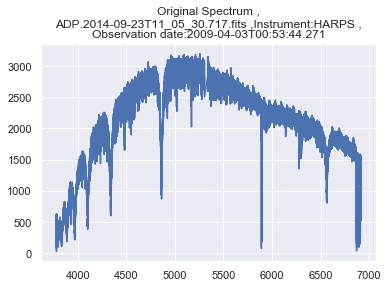

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21861
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


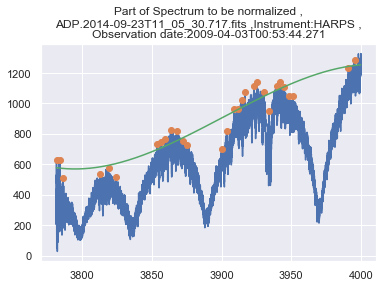

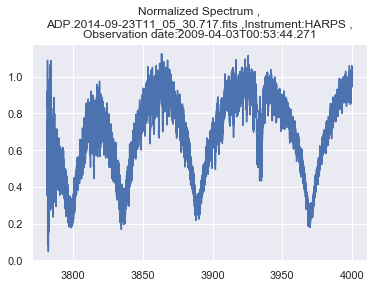

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21861
146861
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


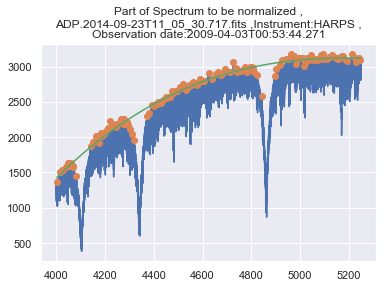

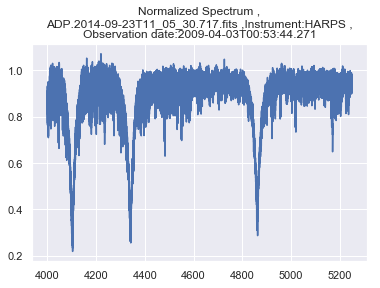

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146861
178566
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


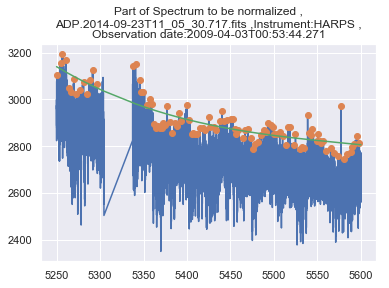

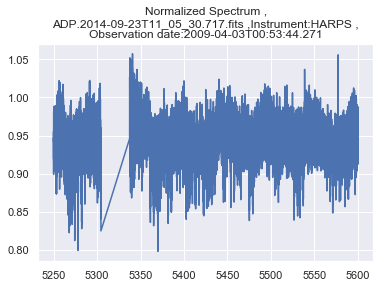

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178566
228566
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


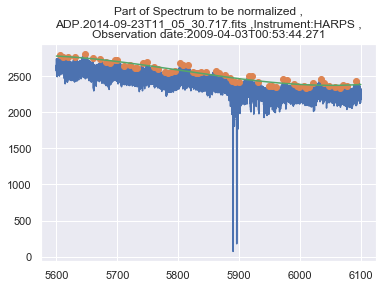

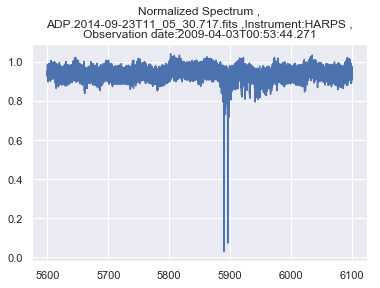

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228566
309878
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


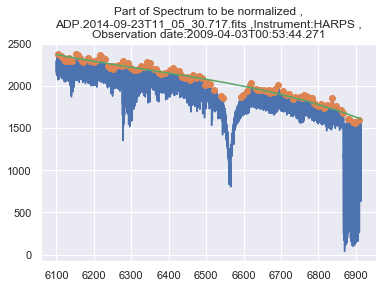

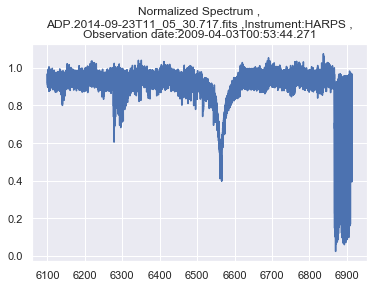

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_33.363.fits HARPS 2009-04-03T04:18:53.613


<Figure size 432x288 with 0 Axes>

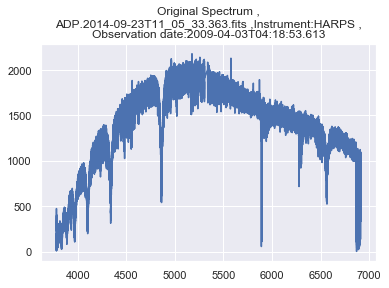

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21850
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


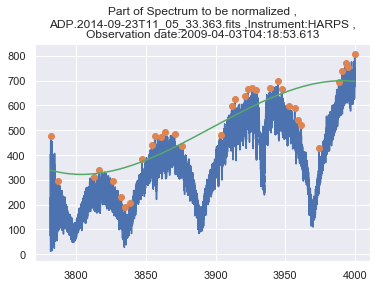

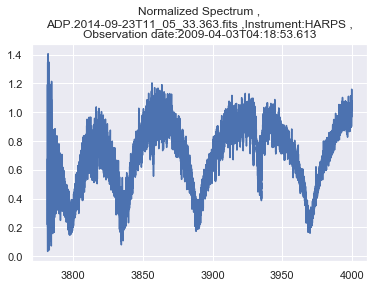

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21850
146850
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


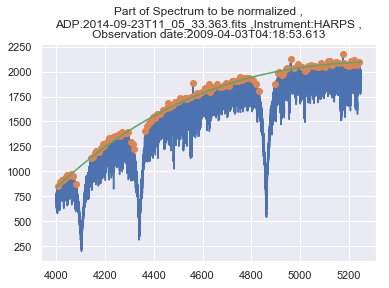

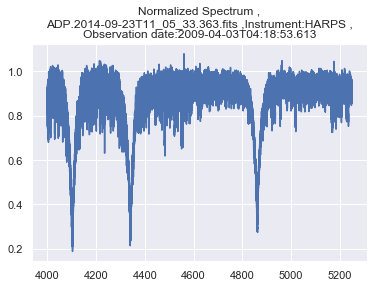

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146850
178556
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


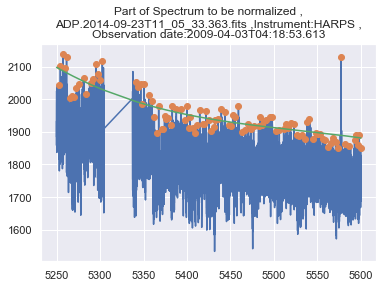

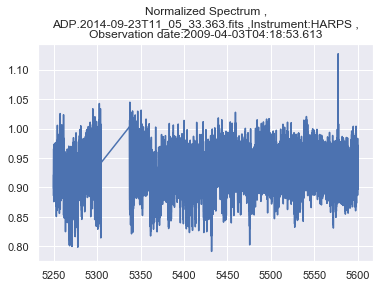

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178556
228556
Do you want to use relative max polynomial fitting(yes/no):350
Give me a lower and upper wavelengths to fit?5600,6100
178556
228556
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


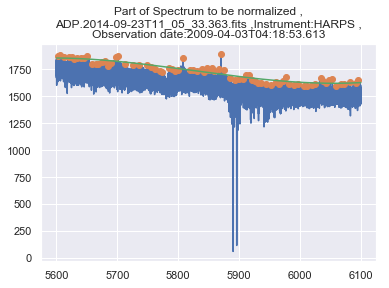

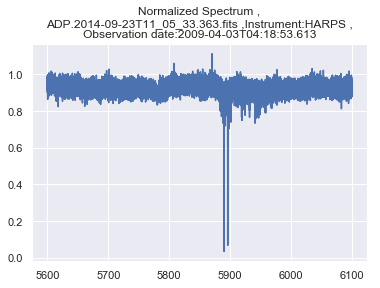

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228556
309868
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


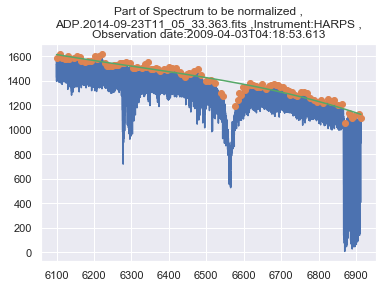

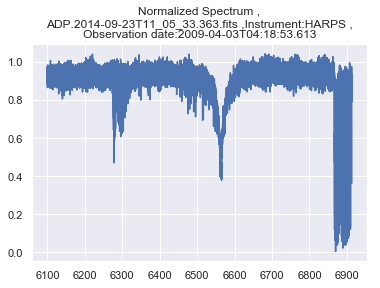

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_33.390.fits HARPS 2009-04-07T03:53:32.271


<Figure size 432x288 with 0 Axes>

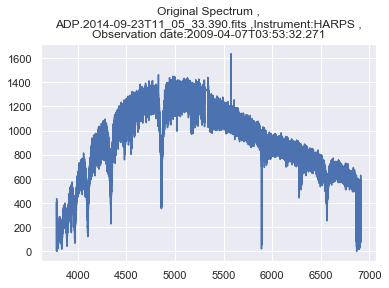

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21840
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


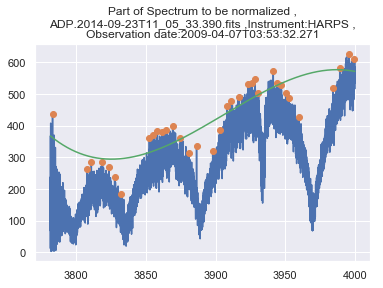

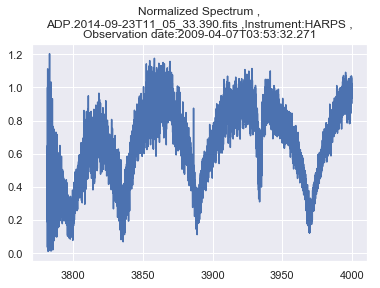

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21840
146840
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


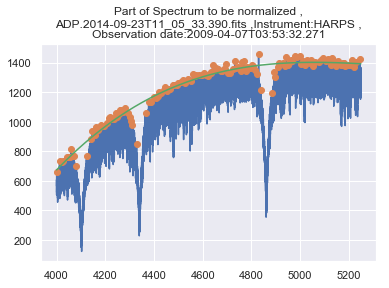

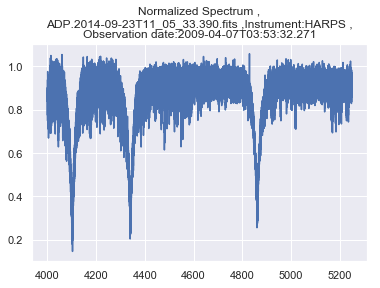

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146840
178545
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


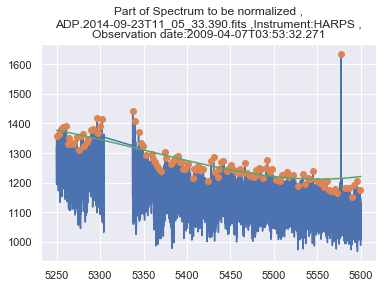

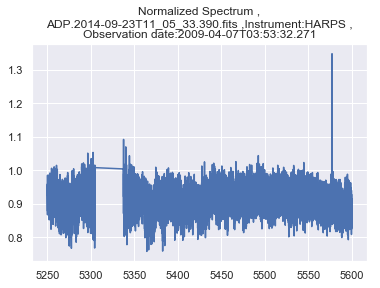

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146840
178545
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:100


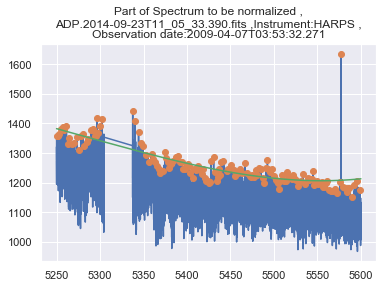

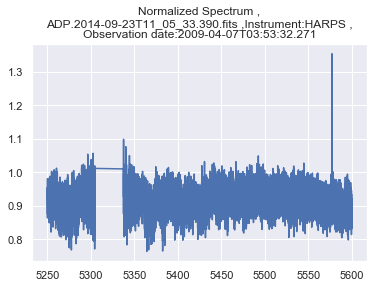

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178545
228545
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


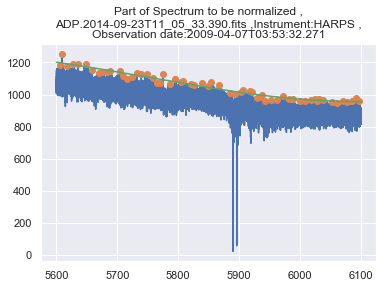

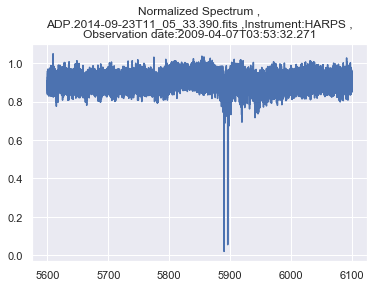

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228545
309854
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


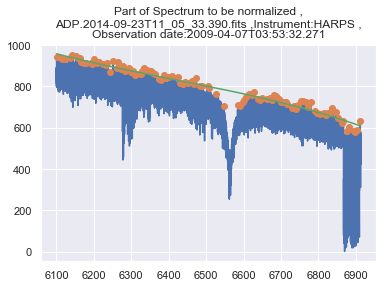

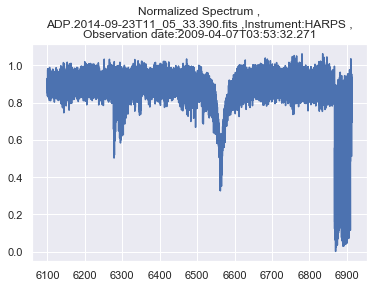

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_47.177.fits HARPS 2009-04-05T03:41:54.295


<Figure size 432x288 with 0 Axes>

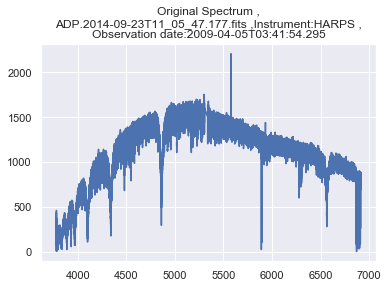

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21845
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


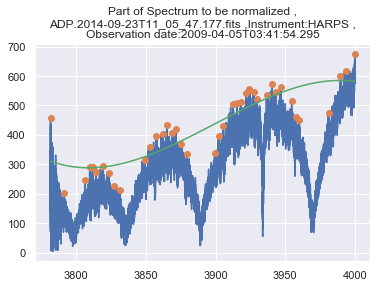

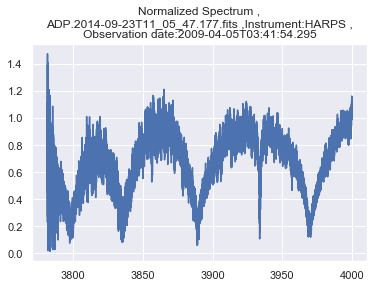

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21845
146845
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


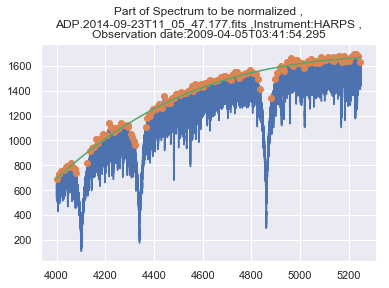

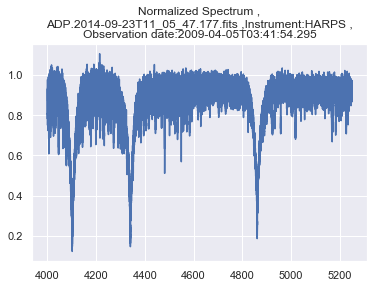

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146845
178551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


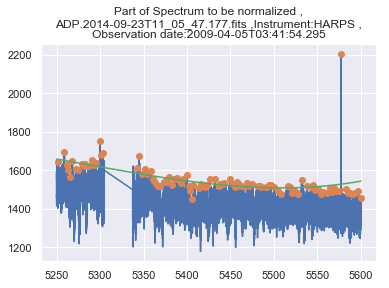

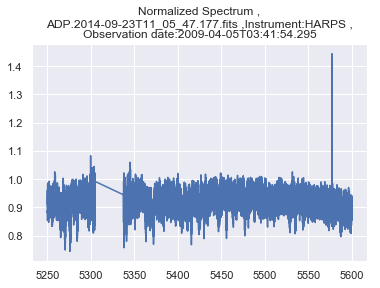

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146845
178551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:100


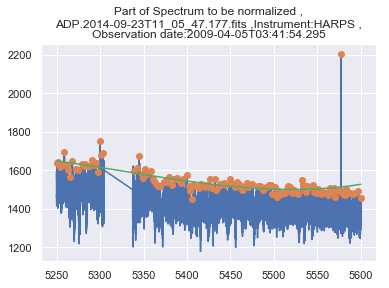

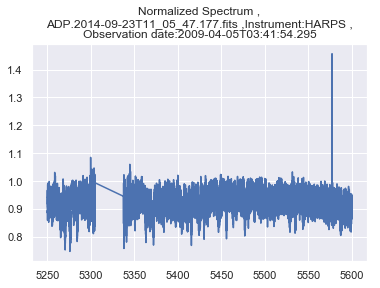

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146845
178551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:70


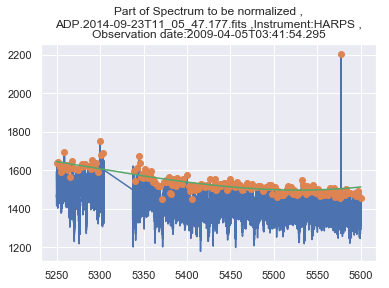

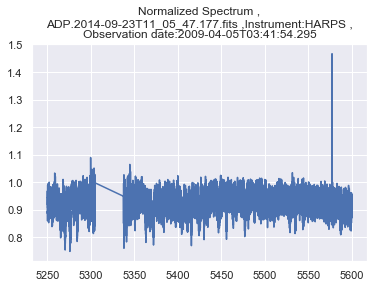

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178551
228551
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


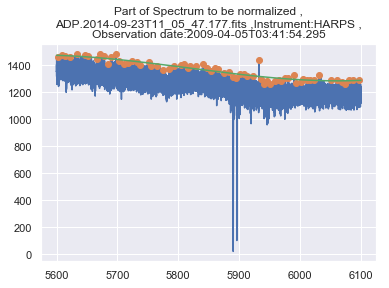

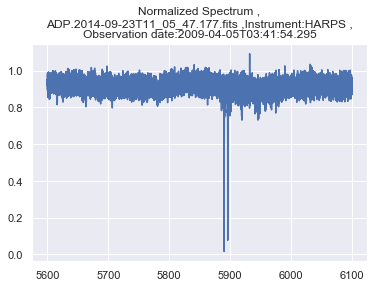

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228551
309861
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


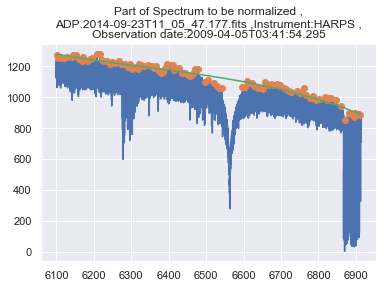

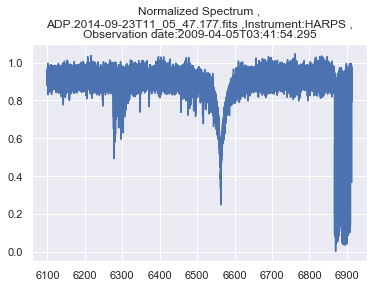

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_05_54.643.fits HARPS 2009-04-08T02:16:32.094


<Figure size 432x288 with 0 Axes>

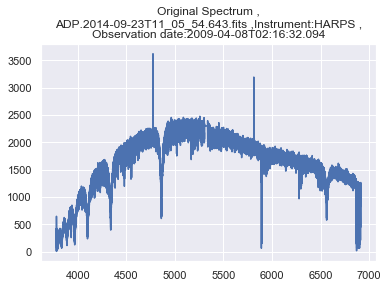

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21853
Do you want to use relative max polynomial fitting(yes/no):yes 
Give me a lower and upper wavelengths to fit?3700,4000
0
21853
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


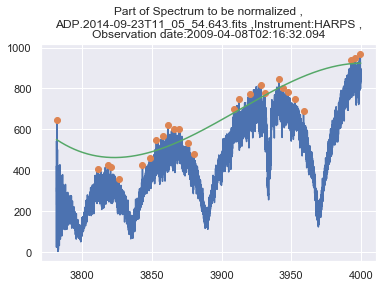

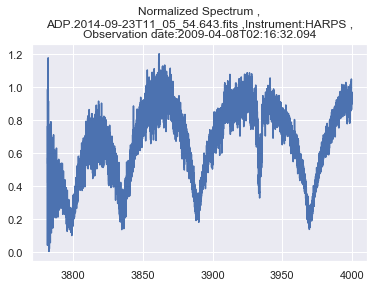

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21853
146853
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


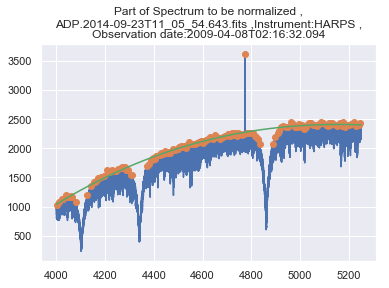

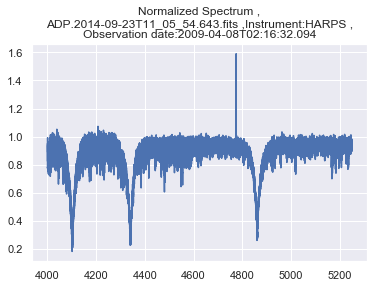

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146853
178558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


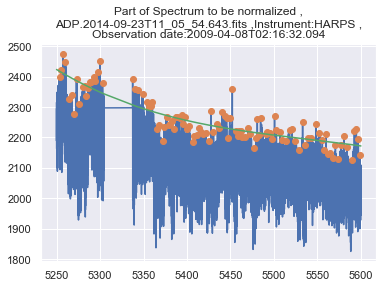

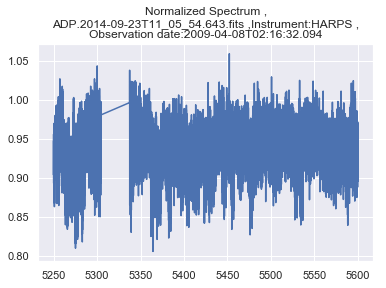

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


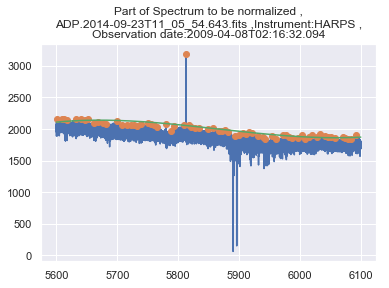

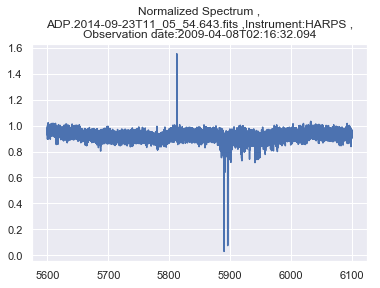

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):300
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:300


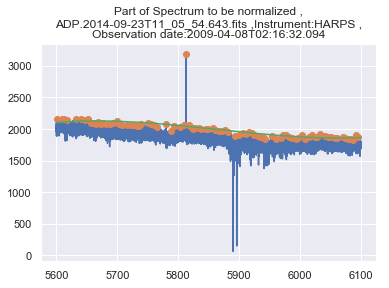

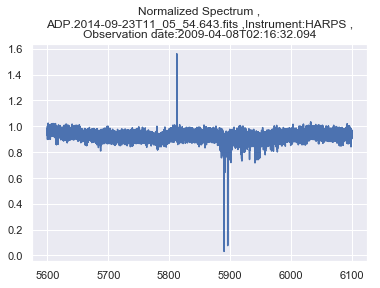

Do you want to save this fit(yes/no):no
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178558
228558
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:250


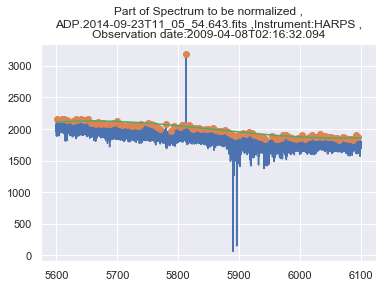

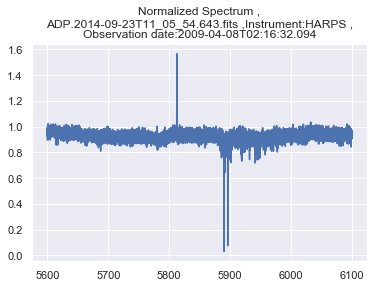

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228558
309867
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


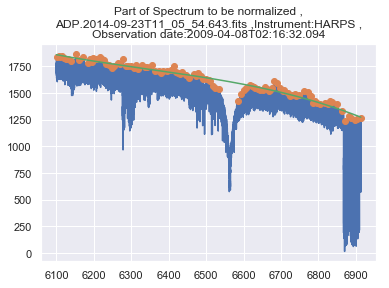

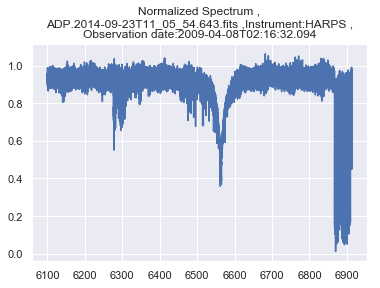

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no
ADP.2014-09-23T11_06_07.137.fits HARPS 2009-04-06T23:43:44.312


<Figure size 432x288 with 0 Axes>

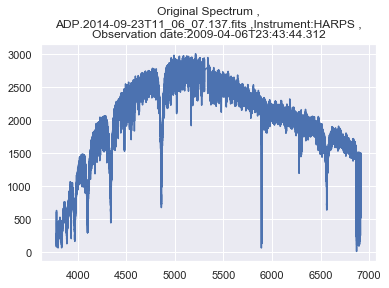

Do you want to fit a model (yes/no):yes
Give me a lower and upper wavelengths to fit?3700,4000
0
21860
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:200


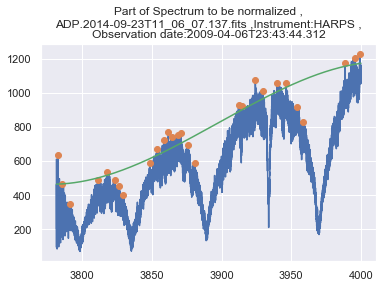

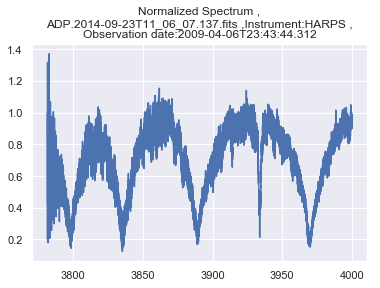

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?4000,5250
21860
146860
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


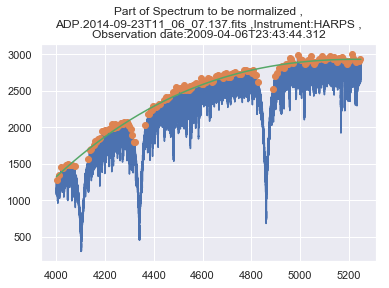

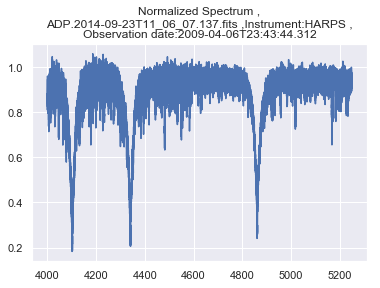

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5250,5600
146860
178565
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:150


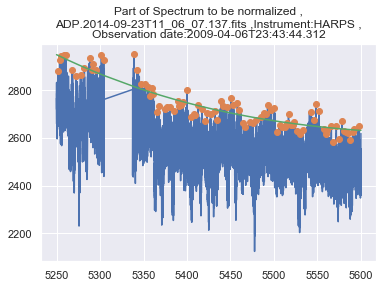

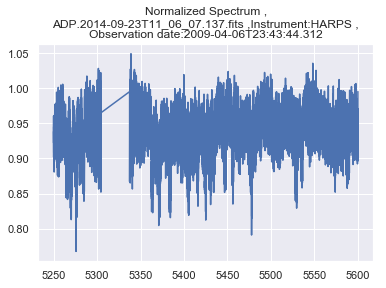

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?5600,6100
178565
228565
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


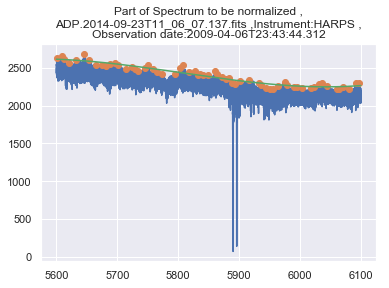

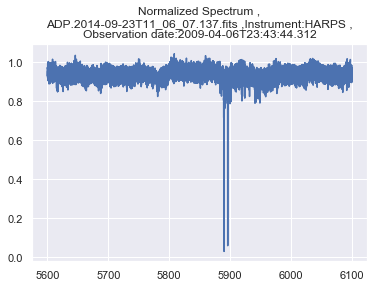

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):yes
Give me a lower and upper wavelengths to fit?6100,7000
228565
309875
Do you want to use relative max polynomial fitting(yes/no):yes
Lets do relative max polynomial fitting.
Give me a window size to do the relative maximum search:350


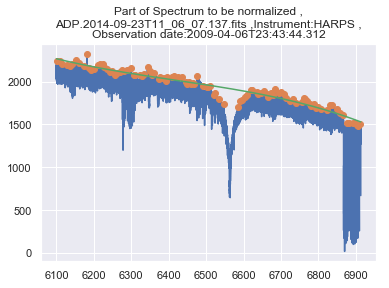

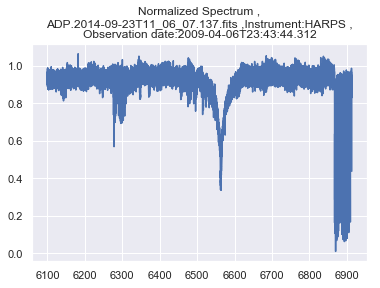

Do you want to save this fit(yes/no):yes
Do you want to keep fitting(yes/no):no


In [71]:
fi = []
instr=[]
obs=[]

wavelen = []
flux = []
flux_norm=[]

wz=[]
maxima=[]
p=[]
pw=[]



for file_row in np.arange(26,32):#range(len(harps_objs["file"])):
    print(harps_objs.loc[file_row,"file"], harps_objs.loc[file_row,"INSTRUME"], harps_objs.loc[file_row,"DATE-OBS"])
    
    
    R=rMax_MedFilt(str('TODO/GradResearch/2014'), str(harps_objs.loc[file_row,"file"]),str("myobjs_harps2019.csv"), file_row)

    fi.append(harps_objs.loc[file_row,"file"])
    obs.append(harps_objs.loc[file_row,"DATE-OBS"])
    instr.append(harps_objs.loc[file_row,"INSTRUME"])
    
    
    wavelen.append(R[0])
    flux.append(R[1])
    flux_norm.append(R[2])
    
    wz.append(R[3])
    maxima.append(R[4])
    p.append(R[5])
    pw.append(R[6])
    
    